In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


In [ ]:
grades_df = pd.read_csv("../datasets/data.csv")
grades_df.sample(5)

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
904,0.43522,3.7,5.8,57.0,34.0
748,0.41638,6.3,7.3,71.0,44.0
811,0.67845,5.3,8.4,49.0,41.0
6,0.56648,7.9,8.1,63.0,54.0
1283,0.90074,4.5,9.0,61.0,47.0


In [ ]:
grades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [ ]:
grades_df.isnull().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

In [ ]:
grades_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Socioeconomic Score,1388.0,0.552274,0.261272,0.10128,0.322118,0.545945,0.78961,0.99982
Study Hours,1388.0,4.560807,1.897581,0.80000,3.475000,3.900000,5.90000,10.00000
Sleep Hours,1388.0,8.047262,1.370700,4.80000,7.000000,8.400000,9.10000,10.00000
Attendance (%),1388.0,58.536023,11.675287,40.00000,49.000000,57.000000,66.00000,100.00000
Grades,1388.0,40.691643,9.467358,32.00000,34.000000,35.000000,47.00000,91.00000


In [ ]:
grades_df.describe(include='object').T

In [ ]:
num_cols = grades_df.select_dtypes(include=["number"]).columns
num_cols

Index(['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)',
       'Grades'],
      dtype='object')

In [ ]:
cat_cols = grades_df.select_dtypes('object').columns
cat_cols

Index([], dtype='object')

In [ ]:
cols_to_drop = ['Grades']
X = grades_df.drop(cols_to_drop, axis=1)  # Удаляем таргет
y = grades_df['Grades']

In [ ]:


cat_cols = X.select_dtypes('object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_cols)
    ], remainder='passthrough')

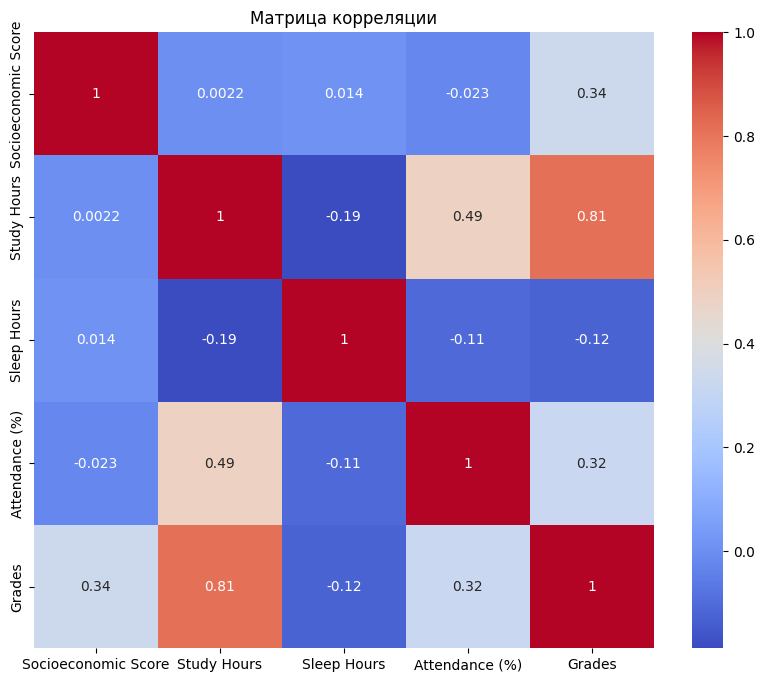

In [ ]:
# Матрица корреляции для числовых признаков
num_df = grades_df[num_cols]
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

In [34]:
X
feat_names = ['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

poly_pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=2)),
                            ('regressor', LinearRegression())])
poly_pipe.fit(X_train, y_train)
y_pred_poly = poly_pipe.predict(X_test)

poly3_pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                            ('regressor', LinearRegression())])
poly3_pipe.fit(X_train, y_train)
y_pred_poly3 = poly3_pipe.predict(X_test)

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

poly_ridge_pipe = Pipeline([('poly', PolynomialFeatures(degree=3)),
                             ('regressor', Ridge(alpha=1))])
poly_ridge_pipe.fit(X_train, y_train)
y_poly_ridge_pipe = poly_ridge_pipe.predict(X_test)

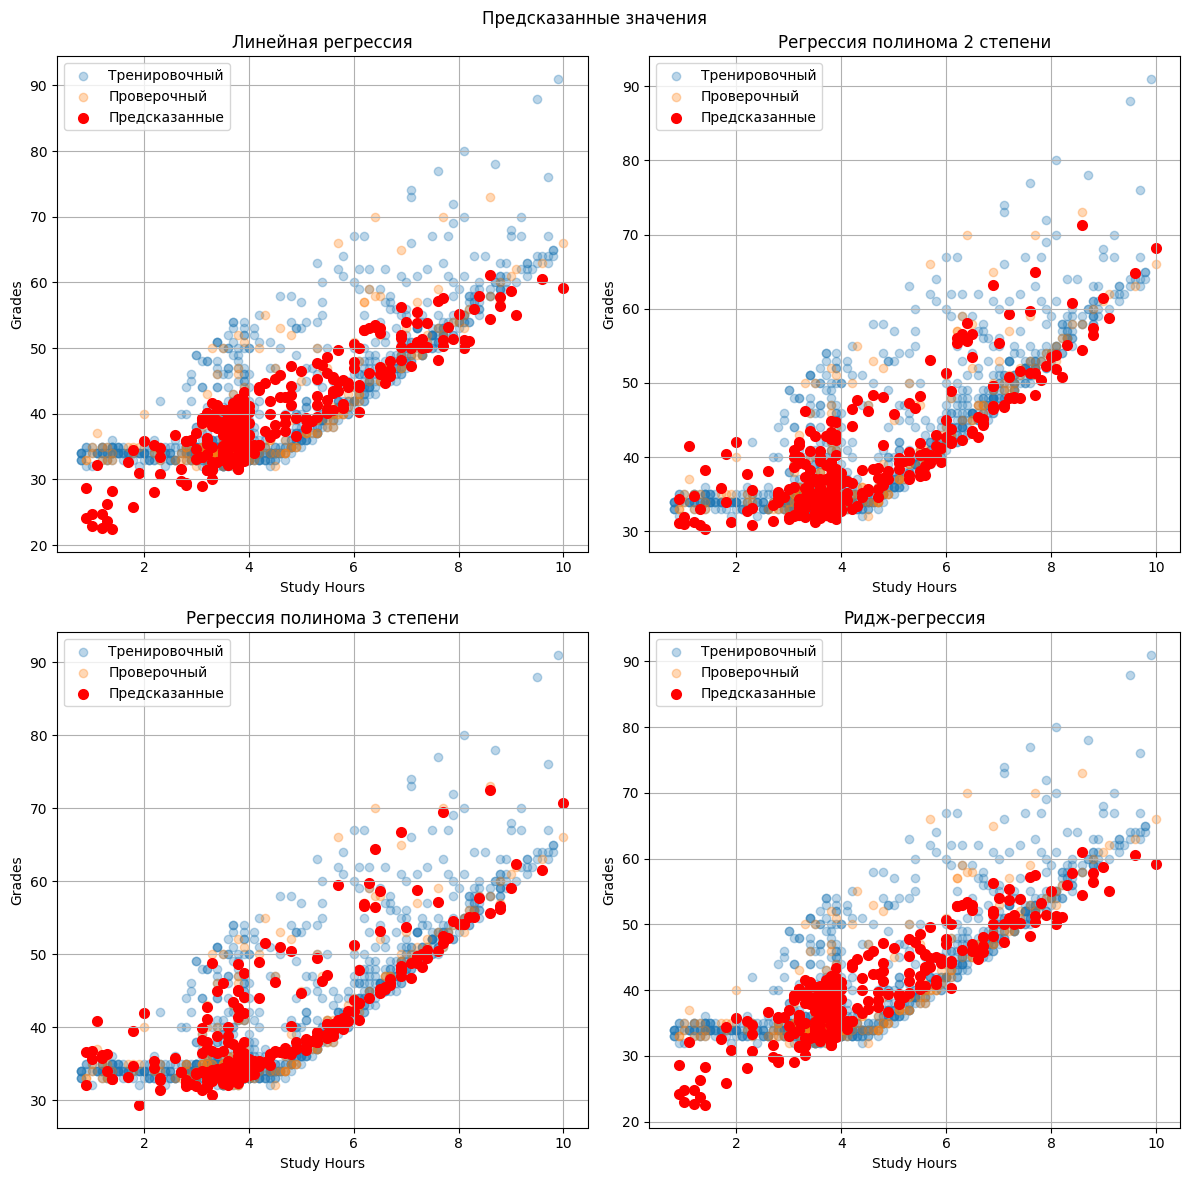

In [45]:
models = [
    ('Линейная регрессия', y_pred_lin),
    ('Регрессия полинома 2 степени', y_pred_poly),
    ('Регрессия полинома 3 степени', y_pred_poly3),
    ('Ридж-регрессия', y_pred_ridge)
]

plt.figure(figsize=(12, 12))

for i, (name, predictions) in enumerate(models):
    plt.subplot(2, 2, i+1)
    plt.title(name)
    plt.scatter(X_train['Study Hours'],  y_train, alpha=0.3, label='Тренировочный') # тренировочный
    plt.scatter(X_test['Study Hours'],   y_test,  alpha=0.3, label='Проверочный')   # проверочный
    plt.scatter( X_test['Study Hours'], predictions,
            lw=2, color='red',
            label='Предсказанные')
    plt.grid(True)  # Сетка. Доп параметры color='black', linewidth=0.7
    plt.legend(loc="best")  # Положение легенды
    plt.xlabel('Study Hours') # Подпись осей
    plt.ylabel("Grades")   # Подпись осей
plt.suptitle(u'Предсказанные значения') # Заголовок
plt.tight_layout()
plt.show()


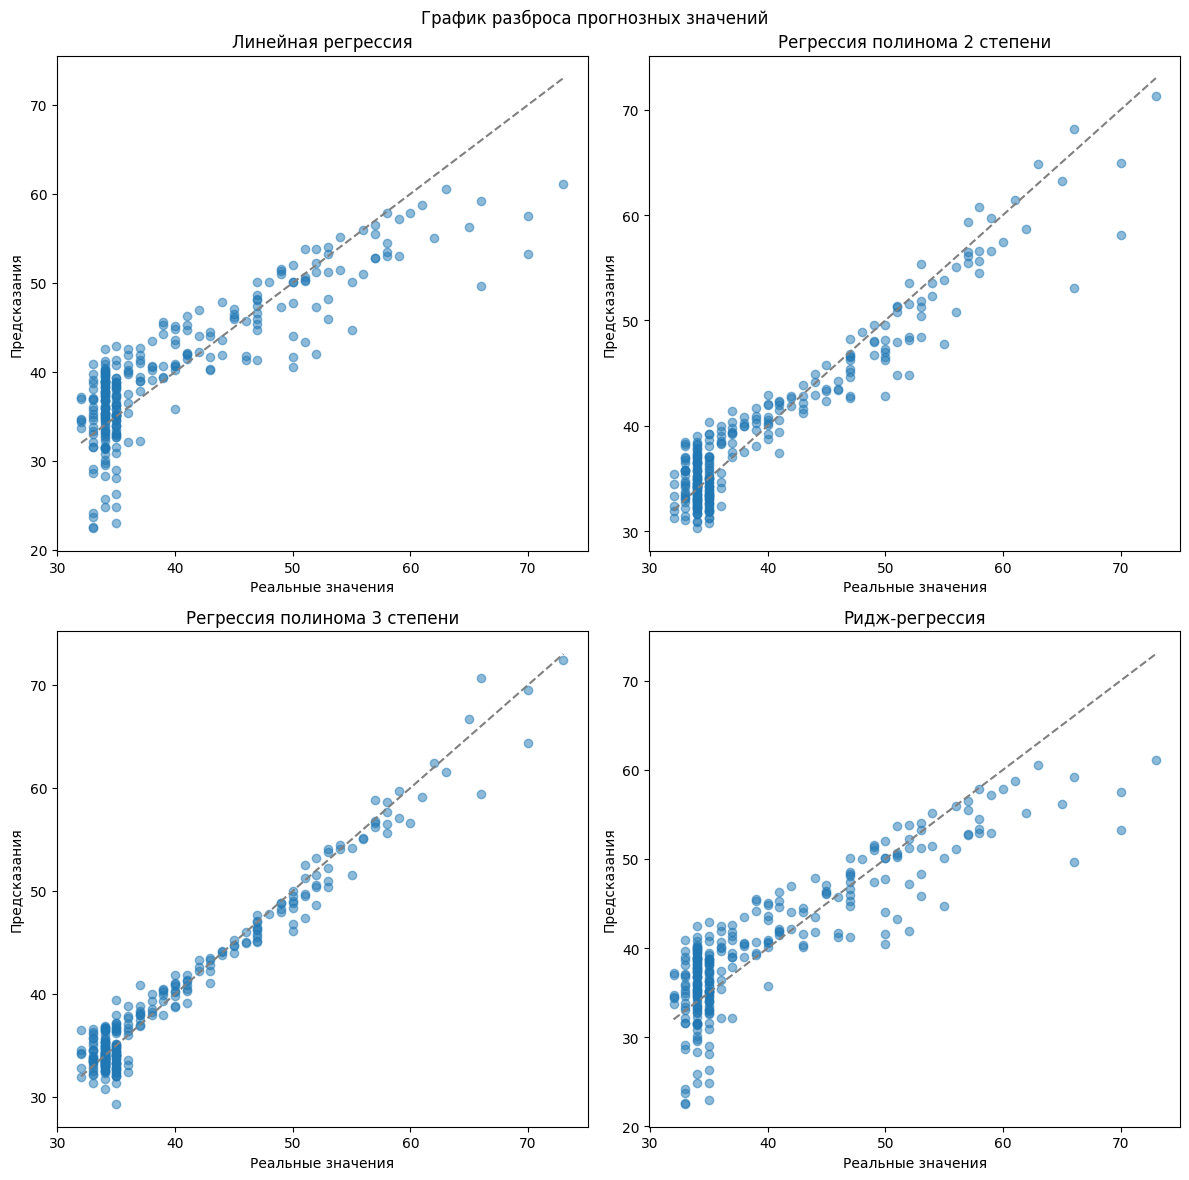

In [46]:
# Показ реальных и прогнозируемых значений
plt.figure(figsize=(12, 12))

for i, (name, predictions) in enumerate(models):
    plt.subplot(2, 2, i+1)
    plt.scatter(y_test, predictions, alpha=0.5) # создание рассеянного графика
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')
    plt.title(name)
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказания')

plt.suptitle('График разброса прогнозных значений')
plt.tight_layout()
plt.show()

In [ ]:
lin_coef = lin_reg.coef_ 
lin_inter = lin_reg.intercept_ 
#feat_names = lin_pipe.named_steps['preprocessor'].get_feature_names_out() 

eq = f"Grades = {lin_inter:.3f}" 
for name, c in zip(feat_names, lin_coef):
    eq += f" + ({c:.3f} * {name})"
print(eq) 

Rent = 16.937 + (12.166 * Socioeconomic Score) + (4.264 * Study Hours) + (0.191 * Sleep Hours) + (-0.066 * Attendance (%))


In [ ]:
ridge_coef = ridge.coef_ 
ridge_inter = ridge.intercept_ 
#feat_names = ridge_pipe.named_steps['preprocessor'].get_feature_names_out() 

eq = f"Grades = {ridge_inter:.3f}" 
for name, c in zip(feat_names, ridge_coef):
    eq += f" + ({c:.3f} * {name})"
print(eq) 

Rent = 17.029 + (12.007 * Socioeconomic Score) + (4.264 * Study Hours) + (0.191 * Sleep Hours) + (-0.066 * Attendance (%))


In [ ]:
poly_coef = poly_pipe.named_steps['regressor'].coef_ 
poly_inter = poly_pipe.named_steps['regressor'].intercept_ 
feat_names = poly_pipe.named_steps['poly'].get_feature_names_out() 

eq = f"Grades = {poly_inter:.3f}" 
for name, c in zip(feat_names, poly_coef):
    eq += f" + ({c:.3f} * {name})"
print(eq) 

Rent = 46.204 + (0.000 * 1) + (-52.390 * x0) + (-4.371 * x1) + (0.066 * x2) + (0.104 * x3) + (44.185 * x0^2) + (2.397 * x0 x1) + (1.527 * x0 x2) + (-0.135 * x0 x3) + (0.571 * x1^2) + (0.185 * x1 x2) + (-0.001 * x1 x3) + (-0.067 * x2^2) + (-0.006 * x2 x3) + (-0.000 * x3^2)


In [ ]:
def print_metrics(y_true, y_pred, model_name):
    print(f'{model_name}:')
    print(f'R2: {r2_score(y_true, y_pred):.4f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}')
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_true, y_pred):.4f}\n')

print_metrics(y_test, y_pred_lin, 'Линейная регрессия')
print_metrics(y_test, y_pred_poly, 'Полиномиальная регрессия 2-ой степени')
print_metrics(y_test, y_pred_poly3, 'Полиномиальная регрессия 3-ой степени')
print_metrics(y_test, y_pred_ridge, 'Ридж-регрессия')
print_metrics(y_test, y_poly_ridge_pipe, 'Polynomial Ridge Regression')

Линейная регрессия:
R2: 0.7447
RMSE: 4.3900
MAE: 3.3862
MSE: 19.2725

Полиномиальная регрессия 2-ой степени:
R2: 0.9114
RMSE: 2.5865
MAE: 1.9813
MSE: 6.6897

Полиномиальная регрессия 3-ой степени:
R2: 0.9631
RMSE: 1.6697
MAE: 1.2580
MSE: 2.7879

Ридж-регрессия:
R2: 0.7449
RMSE: 4.3881
MAE: 3.3833
MSE: 19.2559



In [49]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Linear': y_pred_lin,
    'Predicted_Polynomial_2': y_pred_poly,
    'Predicted_Polynomial_3': y_pred_poly3,
    'Predicted_Ridge': y_pred_ridge
})
results.to_csv('grades_predictions.csv', index=False)
results.head()

,Actual,Predicted_Linear,Predicted_Polynomial_2,Predicted_Polynomial_3,Predicted_Ridge
650,43.0,44.007047,41.252970,42.214625,44.051883
208,35.0,35.001336,31.924003,32.589462,35.012132
427,33.0,35.678796,32.742752,33.938489,35.700416
677,36.0,36.444958,34.650251,35.987747,36.479862
1272,35.0,37.309276,33.420742,35.185949,37.325496
